In [ ]:
"""
Mapping Amman (project with professor Anderson)
Freja Mickos, Lida Karadimou

first part of notebook:
Scraper for search results of restaurants
getting property title cuisine tags, number of reviews, ranking, prices, url for individual restaurants(to be passed on 
the tripadvisor_restaurant file)
future plans would include finding most popular cuisine categories according to reviews, or according to price range

second part of notebook: tripadvisor_restaurant.py
takes as an input urls, returns more information on each individual restaurant
future plans will include getting also location coordinates, mapping them and clustering
"""

In [1]:
import requests
from bs4 import BeautifulSoup
import time
import pandas as pd
import random

#https://www.tripadvisor.com/Restaurants-g293986-Amman_Amman_Governorate.html
"""
soup.find_all('a', {'class':'property_title'})
soup.find_all('span', {'class':'reviewCount'})
soup.find_all('div', {'class':'popIndex rebrand popIndexDefault'}) ranking
soup.find_all('span', {'class':'item price'})
soup.find_all('a', {'class':'item cuisine'})

"""
                          
property_titles = []
review_count = []
rankings = []
prices = []
cuisines = []
url2 = []

for offset in range(0, 19):
    url = 'https://www.tripadvisor.com/Restaurants-g293986-oa' + str(offset) + '-Amman_Amman_Governorate.html#EATERY_OVERVIEW_BOX'

    r = requests.get(url)
#    soup = BeautifulSoup(r.text, "html.parser")
    time.sleep(0.05)
    soup = BeautifulSoup(r.text,"lxml")
#    li = soup.find_all('div', {'id':'EATERY_SEARCH_RESULTS'}) # all restaurants in listing
    
#    for restaurant in soup.find_all(')
    for link in soup.find_all('a', {'class':'property_title'}):
        title = link.text
        property_titles.append(title.strip('\n'))
        
    for link in soup.find_all('span', {'class':'reviewCount'}):
        count = link.text
        review_count.append(count.strip('\n'))
    
    for link in soup.find_all('div', {'class':'popIndex rebrand popIndexDefault'}):
        rank = link.text
        rankings.append(rank.strip('\n'))
        
    # some restaurants don't have a price, have to figure this out
    for link in soup.find_all('span', {'class':'item price'}):
        price = link.text
        prices.append(price.strip('\n'))
       
    # this isn't really working as of now -- it collects all cuisine tags, not just one for each restaurant
    #for link in soup.find_all('a', {'class':'item cuisine'}):
        #cuisine = link.text
        #print(cuisine)
        #cuisines.append(cuisine.strip('\n'))
        
    
    #for this I am not sure what you were thinking about it, but what if we take all of the tag cuisines 
    #for each restaurant as a restaurant may be in more than one category and then perhaps use these also for 
    #clustering or anything ?? 
    
    
    t = []
    for link in soup.find_all('div', {'class':'cuisines'}):
        for k in link.find_all('a',{'class':'item cuisine'}):
            t.append(k.text)
        cuisines.append(t)
        t = []

    #added url so that we can use these links to move through all the pages in tripadvisor_restaurant.py 
    # "https://tripadvisor.com/ + url_of_rest
    for link in soup.find_all('a',{'class':'property_title'}):
        url_of_rest = link['href']
        url2.append(url_of_rest.strip('\n'))

#columns = {'property_title':property_titles, 'review_count':review_count, 'ranking':rankings}
columns = {'property_title':property_titles, 'review_count':review_count, 'url2':url2, 'ranking':rankings, 'cuisines':cuisines}
df = pd.DataFrame(columns)
print(df[:10])

                                            cuisines  \
0                               [American, Barbecue]   
1        [Pizza, Arabic, Halal, Gluten Free Options]   
2                            [Middle Eastern, Halal]   
3  [Lebanese, Mediterranean, Middle Eastern, Hala...   
4  [Mediterranean, Middle Eastern, Halal, Gluten ...   
5              [Steakhouse, American, International]   
6  [Lebanese, Mediterranean, Middle Eastern, Hala...   
7  [American, Vegetarian Friendly, Vegan Options,...   
8  [Fast Food, Mediterranean, Middle Eastern, Veg...   
9  [Fast Food, Mediterranean, Middle Eastern, Veg...   

              property_title                          ranking    review_count  \
0                    Brisket   #1 of 545 Restaurants in Amman    268 reviews    
1            Pizza Roma Cafe   #2 of 545 Restaurants in Amman    300 reviews    
2             Habibah Sweets   #3 of 545 Restaurants in Amman    665 reviews    
3      Fakhreldin Restaurant   #4 of 545 Restaurants in Amm

In [5]:
print(url2)

['/Restaurant_Review-g293986-d7267482-Reviews-Brisket-Amman_Amman_Governorate.html', '/Restaurant_Review-g293986-d3389330-Reviews-Pizza_Roma_Cafe-Amman_Amman_Governorate.html', '/Restaurant_Review-g293986-d2084697-Reviews-Habibah_Sweets-Amman_Amman_Governorate.html', '/Restaurant_Review-g293986-d1371269-Reviews-Fakhreldin_Restaurant-Amman_Amman_Governorate.html', '/Restaurant_Review-g293986-d2406112-Reviews-Sufra_Restaurant-Amman_Amman_Governorate.html', '/Restaurant_Review-g293986-d3989474-Reviews-V_Lounge_Restaurant-Amman_Amman_Governorate.html', '/Restaurant_Review-g293986-d1641029-Reviews-Tawaheen_al_Hawa-Amman_Amman_Governorate.html', '/Restaurant_Review-g293986-d7761403-Reviews-Chestnut_Restaurant_Pub-Amman_Amman_Governorate.html', '/Restaurant_Review-g293986-d1918356-Reviews-Hashem-Amman_Amman_Governorate.html', '/Restaurant_Review-g293986-d3261923-Reviews-Abu_Jbara-Amman_Amman_Governorate.html', '/Restaurant_Review-g293986-d10005312-Reviews-Melograno-Amman_Amman_Governorate.htm

In [22]:
len(url2)

570

In [8]:
import csv
with open('restaurants.csv', 'w') as csvfile:
    df.to_csv('restaurants.csv', sep='\t', encoding='utf-8')
    #df.to_csv(path_or_buf=None, sep=', ', na_rep='', float_format=None, columns=None, header=True, index=True, index_label=None, mode='w', encoding=None, compression=None, quoting=None, quotechar='"', line_terminator='\n', chunksize=None, tupleize_cols=False, date_format=None, doublequote=True, escapechar=None, decimal='.')
    #fieldnames = ['first_name', 'last_name']
    #writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
#df.to_csv(path_or_buf=None, sep=', ', na_rep='', float_format=None, columns=None, header=True, index=True, index_label=None, mode='w', encoding=None, compression=None, quoting=None, quotechar='"', line_terminator='\n', chunksize=None, tupleize_cols=False, date_format=None, doublequote=True, escapechar=None, decimal='.')

In [30]:
with open("links.csv", "w",newline="") as f:
    writer = csv.writer(f)
    for i in url2:
        writer.writerow([i])
    #writer = csv.writer(f, dialect='excel')
    #writer.writerows(url2)

In [58]:
a = str(review_count[0]).split

In [63]:
a= review_count[0]

In [67]:

a.split(" ")[0]

'268'

In [73]:
for a in review_count:
    a.split(" ")[0]
    print(a.split(" ")[0])


268
300
665
787
701
57
713
283
1,361
348
82
197
414
237
116
141
160
275
56
99
131
342
157
308
61
20
144
29
138
39
268
300
665
787
701
57
713
283
1,361
348
82
197
414
237
116
141
160
275
56
99
131
342
157
308
61
20
144
29
138
39
268
300
665
787
701
57
713
283
1,361
348
82
197
414
237
116
141
160
275
56
99
131
342
157
308
61
20
144
29
138
39
268
300
665
787
701
57
713
283
1,361
348
82
197
414
237
116
141
160
275
56
99
131
342
157
308
61
20
144
29
138
39
268
300
665
787
701
57
713
283
1,361
348
82
197
414
237
116
141
160
275
56
99
131
342
157
308
61
20
144
29
138
39
268
300
665
787
701
57
713
283
1,361
348
82
197
414
237
116
141
160
275
56
99
131
342
157
308
61
20
144
29
138
39
268
300
665
787
701
57
713
283
1,361
348
82
197
414
237
116
141
160
275
56
99
131
342
157
308
61
20
144
29
138
39
268
300
665
787
701
57
713
283
1,361
348
82
197
414
237
116
141
160
275
56
99
131
342
157
308
61
20
144
29
138
39
268
300
665
787
701
57
713
283
1,361
348
82
197
414
237
116
141
160
275
56
99
131
342
15

In [ ]:
"""beginning of second file:
tripadvisor_restaurant.ipynb

getting more information on individual restaurants and putting it on a df and csv file, 
information now include: languages of reviews, types of travelers, rank, average rating
"""

In [ ]:
from lxml import html
import requests
from collections import OrderedDict
import json
import argparse
import pandas as pd
import csv

def parse(input_file):
    restaurants = []
    for line in input_file:
        url = line
        response = requests.get(url).text
        parser = html.fromstring(response)
	
        XPATH_RATING = '//div[@id="ratingFilter"]//ul//li'

        XPATH_TRAVELER = '//div[@class="col segment extraWidth"]//ul//li'
        XPATH_TIME = '//div[@class="col season extraWidth"]//ul/li'
        XPATH_LANGUAGE = '//div[@class="col language extraWidth"]//ul/li'
#        XPATH_DETAILS = '//div[contains(@class,"details_tab")]//div[contains(@class, "table_section")]//text()'
        XPATH_NAME = '//h1[@property="name"]//text()'
        XPATH_HOTEL_RATING = '//span[@property="ratingValue"]//@content'
        XPATH_REVIEWS = '//a[@property="reviewCount"]/@content'
        XPATH_RANK = '//div[@class="slim_ranking"]//text()'
        XPATH_OFFICIAL_DESCRIPTION = '//div[contains(@class,"additional_info")]//span[contains(@class,"tabs_descriptive_text")]//text()'
        XPATH_LOCATION = '//div[@class="mapContainer"]//text()'
                                        
        ratings = parser.xpath(XPATH_RATING)
        travelers = parser.xpath(XPATH_TRAVELER)
        times = parser.xpath(XPATH_TIME)
        languages = parser.xpath(XPATH_LANGUAGE)
	
        raw_name = parser.xpath(XPATH_NAME)
        raw_rank = parser.xpath(XPATH_RANK)
        raw_review_count = parser.xpath(XPATH_REVIEWS)
        raw_rating = parser.xpath(XPATH_HOTEL_RATING)
        raw_official_description = parser.xpath(XPATH_OFFICIAL_DESCRIPTION)
#        raw_details = parser.xpath(XPATH_DETAILS)
        raw_location = parser.xpath(XPATH_LOCATION)
					
        name = ''.join(raw_name).strip() if raw_name else None
        rank = ''.join(raw_rank).strip() if raw_rank else None
        review_count = ''.join(raw_review_count).strip() if raw_review_count else None
        hotel_rating = ''.join(raw_rating).strip() if raw_rating else None
        official_description = ' '.join(' '.join(raw_official_description).split()) if raw_official_description else None
#        details = ' '.join(' '.join(raw_details).split()) if raw_details else None
        location = ' '.join(' '.join(raw_location).split()) if raw_location else None       

        ratings_dict = OrderedDict()
        for rating in ratings:
            XPATH_RATING_KEY = './/div[@class="row_label"]//text()'
            XPATH_RATING_VALUE = './/span[@class="row_bar"]/following-sibling::span//text()'
            raw_rating_key = rating.xpath(XPATH_RATING_KEY)
            raw_rating_value = rating.xpath(XPATH_RATING_VALUE)
            cleaned_rating_key = ''.join(raw_rating_key).replace('\n','')
            cleaned_rating_value = ''.join(raw_rating_value).replace('\n','')
            ratings_dict.update({cleaned_rating_key:cleaned_rating_value})
    
        travelers_list = [] 
        for traveler in travelers:
            XPATH_TRAVELER_TYPE = './/label//text()'
            XPATH_TRAVELER_COUNT = './/span//text()'
            raw_traveler_type = traveler.xpath(XPATH_TRAVELER_TYPE)
            raw_traveler_count = traveler.xpath(XPATH_TRAVELER_COUNT)
            cleaned_traveler_type = ''.join(raw_traveler_type).replace('\n','').split(' ')
            cleaned_traveler_type = cleaned_traveler_type[0]
            cleaned_traveler_count = ''.join(raw_traveler_count).replace('\n','')
            travelers_list.append((cleaned_traveler_type,cleaned_traveler_count))
        
        times_list = []
        for time in times:
            XPATH_TIME_TYPE = './/label//text()'
            XPATH_TIME_COUNT = './/span//text()'
            raw_time_type = time.xpath(XPATH_TIME_TYPE)
            raw_time_count = time.xpath(XPATH_TIME_COUNT)
            cleaned_time_type = ''.join(raw_time_type).replace('\n','').split(' ')
            cleaned_time_type = cleaned_time_type[0]
            cleaned_time_count = ''.join(raw_time_count).replace('\n','')
            times_list.append((cleaned_time_type, cleaned_time_count))
        
        language_list = []
        for language in languages:
            XPATH_LANGUAGE_TYPE = './/label//text()'
#            XPATH_LANGUAGE_COUNT = './/span//text()'
            raw_language_type = language.xpath(XPATH_LANGUAGE_TYPE)
#            raw_language_count = language.xpath(XPATH_LANGUAGE_COUNT)
            cleaned_language_type = ''.join(raw_language_type).replace('\n','').split(' ')
            cleaned_language_type = cleaned_language_type[0]
#            cleaned_language_count = ''.join(raw_language_count).replace('\n','')
#            languages_dict.update({cleaned_language_type:cleaned_language_count})
            language_list.append(cleaned_language_type)
        language_list = language_list[1:]


        data = {'name':name,
				'rank':rank,
				'rating':hotel_rating,
                'review_count':review_count,
                'location':location,
                'official_description':official_description,
                  'travelers':travelers_list,
                  'times of year':times_list,
                  'languages':language_list
#                  'details':details
	    }
        restaurants.append(data)
        
        
#    columns = ['property_title', 'rank', 'rating', 'review_count', 'location', 'official_description', 'travelers', 'times', 'langauges']
    df = pd.DataFrame(restaurants)
    return df



input_file = open('restaurants.txt', 'r')
scraped_data = parse(input_file)
scraped_data

In [ ]:
with open('restaurants_details.csv', 'w') as csvfile:
    scraped_data.to_csv(csvfile, sep='\t', encoding='utf-8')

In [3]:
%matplotlib inline
import requests
from bs4 import BeautifulSoup
import time
import pandas as pd
import random
import matplotlib as plt
from lxml import html

#https://www.tripadvisor.com/Restaurants-g293986-Amman_Amman_Governorate.html
"""
soup.find_all('a', {'class':'property_title'})
soup.find_all('span', {'class':'reviewCount'})
soup.find_all('div', {'class':'popIndex rebrand popIndexDefault'}) ranking
soup.find_all('span', {'class':'item price'})
soup.find_all('a', {'class':'item cuisine'})

"""
                          
property_titles = []
review_count = []
rankings = []
prices = []
cuisines = []
url2 = []
latitude = []
longitude = []

for offset in range(0, 19):
    url = 'https://www.tripadvisor.com/Restaurants-g293986-oa' + str(offset) + '-Amman_Amman_Governorate.html#EATERY_OVERVIEW_BOX'

    r = requests.get(url)
#    soup = BeautifulSoup(r.text, "html.parser")
    time.sleep(0.05)
    soup = BeautifulSoup(r.text,"lxml")
#    li = soup.find_all('div', {'id':'EATERY_SEARCH_RESULTS'}) # all restaurants in listing
    
#    for restaurant in soup.find_all(')
    for link in soup.find_all('a', {'class':'property_title'}):
        title = link.text
        property_titles.append(title.strip('\n'))
        
    for link in soup.find_all('span', {'class':'reviewCount'}):
        count = link.text
        count = count.strip(' reviews\n')
        count = count.replace(',', '')
        review_count.append(int(count))
        
    for link in soup.find_all('div', {'class':'popIndex rebrand popIndexDefault'}):
        rank = link.text
        rankings.append(rank.strip('\n'))
        
    # some restaurants don't have a price, have to figure this out
    for link in soup.find_all('span', {'class':'item price'}):
        price = link.text
        prices.append(price.strip('\n'))
       
    # this isn't really working as of now -- it collects all cuisine tags, not just one for each restaurant
    #for link in soup.find_all('a', {'class':'item cuisine'}):
        #cuisine = link.text
        #print(cuisine)
        #cuisines.append(cuisine.strip('\n'))
        
    
    #for this I am not sure what you were thinking about it, but what if we take all of the tag cuisines 
    #for each restaurant as a restaurant may be in more than one category and then perhaps use these also for 
    #clustering or anything ?? 
    
    
    t = []
    for link in soup.find_all('div', {'class':'cuisines'}):
        for k in link.find_all('a',{'class':'item cuisine'}):
            if len(t) < 1:
                t.append(k.text)
        cuisines.append(''.join(t))
        t = []

    #added url so that we can use these links to move through all the pages in tripadvisor_restaurant.py 
    # "https://tripadvisor.com/ + url_of_rest
    for link in soup.find_all('a',{'class':'property_title'}):
        url_of_rest = link['href']
        url2.append(url_of_rest.strip('\n'))

        
input_file = open('links.csv', 'r')
base_url = "https://www.tripadvisor.com"
for line in input_file:
    url = line
    restaurant_url = base_url + url
    response = requests.get(restaurant_url).text
    parser = html.fromstring(response)
    XPATH_LATITUDE = '//div[@class="mapContainer"]//@data-lat'
    XPATH_LONGITUDE = '//div[@class="mapContainer"]//@data-lng'
    raw_latitude = parser.xpath(XPATH_LATITUDE)
    raw_longitude = parser.xpath(XPATH_LONGITUDE)
    lat = ' '.join(' '.join(raw_latitude).split()) if raw_latitude else None
    long = ' '.join(' '.join(raw_longitude).split()) if raw_longitude else None
    latitude.append(lat)
    longitude.append(long)
        

columns = {'property_title':property_titles, 'latitude':latitude, 'longitude':longitude, 'review_count':review_count, 'url2':url2, 'ranking':rankings, 'cuisines':cuisines}
df = pd.DataFrame(columns)
df

,cuisines,latitude,longitude,property_title,ranking,review_count,url2
0,Pizza,31.952438,35.937958,Pizza Roma Cafe,#1 of 552 Restaurants in Amman,305,/Restaurant_Review-g293986-d3389330-Reviews-Pi...
1,American,31.963032,35.89816,Brisket,#2 of 552 Restaurants in Amman,271,/Restaurant_Review-g293986-d7267482-Reviews-Br...
2,Middle Eastern,31.951878,35.9332,Habibah Sweets,#3 of 552 Restaurants in Amman,676,/Restaurant_Review-g293986-d2084697-Reviews-Ha...
3,Lebanese,31.952278,35.92017,Fakhreldin Restaurant,#4 of 552 Restaurants in Amman,791,/Restaurant_Review-g293986-d1371269-Reviews-Fa...
4,Mediterranean,31.94924,35.929058,Sufra Restaurant,#5 of 552 Restaurants in Amman,707,/Restaurant_Review-g293986-d2406112-Reviews-Su...
5,Steakhouse,31.992243,35.866783,V Lounge & Restaurant,#6 of 552 Restaurants in Amman,60,/Restaurant_Review-g293986-d3989474-Reviews-V_...
6,Lebanese,31.952156,35.91342,Tawaheen al-Hawa,#7 of 552 Restaurants in Amman,713,/Restaurant_Review-g293986-d1641029-Reviews-Ta...
7,American,31.961784,35.8701,Chestnut Restaurant & Pub,#8 of 552 Restaurants in Amman,284,/Restaurant_Review-g293986-d7761403-Reviews-Ch...
8,Fast Food,31.952234,35.93188,Hashem,#9 of 552 Restaurants in Amman,1374,/Restaurant_Review-g293986-d1918356-Reviews-Ha...
9,Italian,31.953451,35.884483,Melograno,#10 of 552 Restaurants in Amman,86,/Restaurant_Review-g293986-d10005312-Reviews-M...


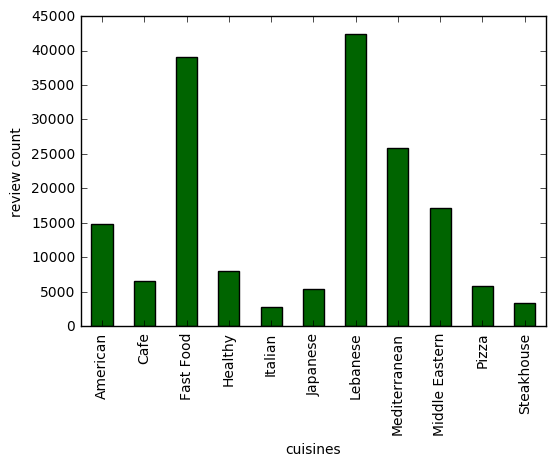

In [8]:
df2 = df[['cuisines', 'review_count']]
df2 = df2.groupby(['cuisines'])['review_count'].sum()
df2
fig4 = df2.plot(kind="bar",color = "darkgreen")
plt.axes.Axes.set_ylabel(fig4 ,'review count')